In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import multiprocessing
import glob
import os
import time
import tqdm

In [2]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, r_regression,  mutual_info_regression, SelectFromModel
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, f1_score


# Prepare dataset  for binary classification

In [3]:
def get_feature(path):
    img = cv2.imread(path)
    return img.flatten()

In [4]:
person_path = glob.glob(os.path.join("./data/train/person/", "*.png"))
air_path = glob.glob(os.path.join("./data/train/airplane/", "*.png"))
dog_path = glob.glob(os.path.join("./data/train/dog/", "*.png"))
car_path = glob.glob(os.path.join("./data/train/car/", "*.png"))

In [5]:
X_per = None
i=0
for img in person_path:
    if(i==0):
        X_per = get_feature(person_path[0])
        i+=1
    else:
        X_per = np.vstack((X_per, get_feature(img)))

In [6]:
X_air = None
i=0
for img in air_path:
    if(i==0):
        X_air = get_feature(air_path[0])
        i+=1
    else:
        X_air = np.vstack((X_air, get_feature(img)))

In [7]:
X_car = None
i=0
for img in car_path:
    if(i==0):
        X_car = get_feature(car_path[0])
        i+=1
    else:
        X_car = np.vstack((X_car, get_feature(img)))

In [8]:
X_dog = None
i=0
for img in dog_path:
    if(i==0):
        X_dog = get_feature(dog_path[0])
        i+=1
    else:
        X_dog = np.vstack((X_dog, get_feature(img)))

In [9]:
print(f'Dimension of X_per: {X_per.shape}\nDimension of X_air: {X_air.shape}\nDimension of X_dog: {X_dog.shape}\nDimension of X_air: {X_car.shape}')

Dimension of X_per: (500, 3072)
Dimension of X_air: (500, 3072)
Dimension of X_dog: (500, 3072)
Dimension of X_air: (500, 3072)


In [10]:
X_train = np.vstack((X_car, X_per, X_air, X_dog))
y_train = np.vstack((np.zeros((len(X_car), 1)), np.ones((len(X_per), 1)), 2*np.ones((len(X_air), 1)), 3*np.ones((len(X_dog), 1))))      # y_per + y_not_per
print(f'Dimension of X_train: {X_train.shape}\nDimension of y_train: {y_train.shape}')

Dimension of X_train: (2000, 3072)
Dimension of y_train: (2000, 1)


In [11]:
person_path_val = glob.glob(os.path.join("./data/validation/person/", "*.png"))
air_path_val = glob.glob(os.path.join("./data/validation/airplane/", "*.png"))
dog_path_val = glob.glob(os.path.join("./data/validation/dog/", "*.png"))
car_path_val = glob.glob(os.path.join("./data/validation/car/", "*.png"))

In [12]:
X_per_val = None
i=0
for img in person_path_val:
    if(i==0):
        X_per_val = get_feature(person_path_val[0])
        i+=1
    else:
        X_per_val = np.vstack((X_per_val, get_feature(img)))

In [13]:
X_air_val = None
i=0
for img in air_path_val:
    if(i==0):
        X_air_val = get_feature(air_path_val[0])
        i+=1
    else:
        X_air_val = np.vstack((X_air_val, get_feature(img)))

In [14]:
X_car_val = None
i=0
for img in car_path_val:
    if(i==0):
        X_car_val = get_feature(car_path_val[0])
        i+=1
    else:
        X_car_val = np.vstack((X_car_val, get_feature(img)))

In [15]:
X_dog_val = None
i=0
for img in dog_path_val:
    if(i==0):
        X_dog_val = get_feature(dog_path_val[0])
        i+=1
    else:
        X_dog_val = np.vstack((X_dog_val, get_feature(img)))

In [16]:
print(f'Dimension of X_per: {X_per_val.shape}\nDimension of X_air: {X_air_val.shape}\nDimension of X_dog: {X_dog_val.shape}\nDimension of X_air: {X_car_val.shape}')

Dimension of X_per: (100, 3072)
Dimension of X_air: (100, 3072)
Dimension of X_dog: (100, 3072)
Dimension of X_air: (100, 3072)


In [17]:
X_val = np.vstack((X_car_val, X_per_val, X_air_val, X_dog_val))
y_val = np.vstack((np.zeros((len(X_car_val), 1)), np.ones((len(X_per_val), 1)), 2*np.ones((len(X_air_val), 1)), 3*np.ones((len(X_dog_val), 1))))      # y_per + y_not_per
print(f'Dimension of X_train: {X_val.shape}\nDimension of y_train: {y_val.shape}')

Dimension of X_train: (400, 3072)
Dimension of y_train: (400, 1)


In [18]:
path_test = glob.glob(os.path.join("./data/test_sample/", "*.png"))

X_test = None
i=0
for img in path_test:
    if(i==0):
        X_test = get_feature(path_test[0])
        i+=1
    else:
        X_test = np.vstack((X_test, get_feature(img)))
        
y_test = np.asarray([0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1])

print(f'Dimension of X_test: {X_test.shape}\nDimension of y_test: {len(y_test)}')

Dimension of X_test: (18, 3072)
Dimension of y_test: 18


In [18]:
def accuracy_score(y_true, y_pred):
    """
    Calculate the accuracy score.
    y_true: ndarray of shape (n_samples,), the true target values.
    y_pred: ndarray of shape (n_samples,), the predicted target values.
    """
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    acc = correct / total
    return acc


def precision_score(y_true, y_pred):
    """
    Calculate the precision score.
    y_true: ndarray of shape (n_samples,), the true target values.
    y_pred: ndarray of shape (n_samples,), the predicted target values.
    """
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    precision = true_positives / (true_positives + false_positives)
    return precision


def recall_score(y_true, y_pred):
    """
    Calculate the recall score.
    y_true: ndarray of shape (n_samples,), the true target values.
    y_pred: ndarray of shape (n_samples,), the predicted target values.
    """
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    recall = true_positives / (true_positives + false_negatives)
    return recall


## Decision Tree sklearn

In [19]:
def evaluate_sklearn(max_depth = 10, min_splitting = 7, criteria = 'gini', isCM = False, X_train  = X_train, X_val = X_val):
    start = time.time()
    clf = DecisionTreeClassifier(max_depth = max_depth, criterion = criteria, min_samples_split = min_splitting)
    clf = clf.fit(X_train,y_train)
    y = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    
    # Train predictions
    train_acc = accuracy_score(y_train.ravel(), y)
    train_precision = precision_score(y_train.ravel(), y)
    train_recall = recall_score(y_train.ravel(), y)

    # Validation predictions
    val_acc = accuracy_score(y_val.ravel(), y_pred_val)
    val_precision = precision_score(y_val.ravel(), y_pred_val)
    val_recall = recall_score(y_val.ravel(), y_pred_val)

    print(f"Train Accuracy: {train_acc:.5f}, Train Precision: {train_precision:.5f}, Train Recall: {train_recall:.5f}")
    print(f"Validation Accuracy: {val_acc:.5f}, Validation Precision: {val_precision:.5f}, Validation Recall: {val_recall:.5f}")
    print(f'Evaluation time for max_depth = {max_depth}, min_samples_split = {min_splitting} is {time.time() - start} seconds')
    
    if(isCM):
        com = confusion_matrix(y_pred_val, y_val.ravel(), labels = [0, 1, 2, 3])
        disp = ConfusionMatrixDisplay(com)
        disp.plot()
        name = "./img/multi_sklearn"+str(max_depth)+"_ss"+str(min_splitting)+"_c"+criteria+".png"
        plt.savefig(name)
    
    return train_acc, val_acc

Train Accuracy: 0.96900, Train Precision: 0.99795, Train Recall: 0.99591
Validation Accuracy: 0.74500, Validation Precision: 0.95294, Validation Recall: 0.89011
Evaluation time for max_depth = 10, min_samples_split = 7 is 2.6017630100250244 seconds


(0.969, 0.745)

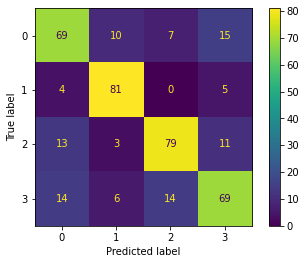

In [20]:
evaluate_sklearn(criteria = 'gini', isCM = True)

Train Accuracy: 0.97100, Train Precision: 0.99598, Train Recall: 0.99799
Validation Accuracy: 0.72500, Validation Precision: 0.97727, Validation Recall: 0.94505
Evaluation time for max_depth = 10, min_samples_split = 7 is 3.8990581035614014 seconds


(0.971, 0.725)

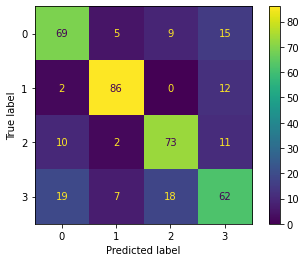

In [21]:
evaluate_sklearn(criteria = 'entropy', isCM = True)

In [26]:
d = []
s = []
train_acc = []
val_acc = []
for i in range(2,21,5):
    for depth in range(5,21,5):
        d.append(depth)
        s.append(i)
        t,v = evaluate_sklearn(depth, i, 'gini')
        train_acc.append(t)
        val_acc.append(v)

Train Accuracy: 0.81450, Train Precision: 0.96845, Train Recall: 0.99501
Validation Accuracy: 0.71000, Validation Precision: 0.87342, Validation Recall: 0.97183
Evaluation time for max_depth = 5, min_samples_split = 2 is 4.435137510299683 seconds
Train Accuracy: 0.98500, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.73250, Validation Precision: 0.87013, Validation Recall: 0.91781
Evaluation time for max_depth = 10, min_samples_split = 2 is 7.165358304977417 seconds
Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.73750, Validation Precision: 0.84884, Validation Recall: 0.89024
Evaluation time for max_depth = 15, min_samples_split = 2 is 7.964108943939209 seconds
Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.71250, Validation Precision: 0.88750, Validation Recall: 0.94667
Evaluation time for max_depth = 20, min_samples_split = 2 is 8.032432317733765 seconds
Train Acc

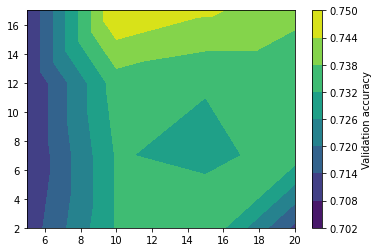

<Figure size 432x288 with 0 Axes>

In [28]:
plt.tricontourf(d, s, val_acc)
plt.colorbar(label="Validation accuracy")
plt.show()
plt.savefig("./img/multi_a_contour_gini.png")

In [ ]:
plt.tricontourf(d, s, val_acc)
plt.colorbar(label="Validation accuracy")
plt.show()
plt.savefig("./img/multi_a_contour_gini.png")

In [44]:
# def e_p(depth):
#     for i in range(5,21,2):
#         d.append(depth)
#         s.append(i)
#         t,v = evaluate_sklearn(depth, i, 'entropy')
#         train_acc.append(t)
#         val_acc.append(v)

In [ ]:
# d = []
# s = []
# train_acc = []
# val_acc = []
# pool_obj = multiprocessing.Pool()
# pool_obj.map(e_p,range(12,33,4))
# pool_obj.close()

In [23]:
d = []
s = []
train_acc = []
val_acc = []
for i in range(2,14,2):
    for depth in range(12,50,4):
        d.append(depth)
        s.append(i)
        t,v = evaluate_sklearn(depth, i, 'entropy')
        train_acc.append(t)
        val_acc.append(v)

Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.72250, Validation Precision: 0.95652, Validation Recall: 0.89189
Evaluation time for max_depth = 12, min_samples_split = 2 is 3.8439443111419678 seconds
Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.71500, Validation Precision: 0.98485, Validation Recall: 0.94203
Evaluation time for max_depth = 16, min_samples_split = 2 is 3.8423914909362793 seconds
Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.74000, Validation Precision: 0.95775, Validation Recall: 0.93151
Evaluation time for max_depth = 20, min_samples_split = 2 is 3.8556251525878906 seconds
Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.72750, Validation Precision: 0.96970, Validation Recall: 0.92754
Evaluation time for max_depth = 24, min_samples_split = 2 is 3.8943898677825928 seconds
Trai

Train Accuracy: 0.98150, Train Precision: 0.99795, Train Recall: 0.99591
Validation Accuracy: 0.71750, Validation Precision: 0.97059, Validation Recall: 0.91667
Evaluation time for max_depth = 24, min_samples_split = 8 is 3.8905255794525146 seconds
Train Accuracy: 0.98150, Train Precision: 0.99795, Train Recall: 0.99388
Validation Accuracy: 0.73000, Validation Precision: 0.95652, Validation Recall: 0.95652
Evaluation time for max_depth = 28, min_samples_split = 8 is 4.07790732383728 seconds
Train Accuracy: 0.98150, Train Precision: 0.99796, Train Recall: 0.99592
Validation Accuracy: 0.72500, Validation Precision: 0.92000, Validation Recall: 0.94521
Evaluation time for max_depth = 32, min_samples_split = 8 is 3.9583117961883545 seconds
Train Accuracy: 0.98000, Train Precision: 0.99796, Train Recall: 0.99592
Validation Accuracy: 0.73250, Validation Precision: 0.93333, Validation Recall: 0.97222
Evaluation time for max_depth = 36, min_samples_split = 8 is 3.8740501403808594 seconds
Train 

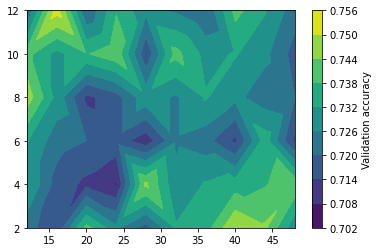

<Figure size 432x288 with 0 Axes>

In [24]:
plt.tricontourf(d, s, val_acc)
plt.colorbar(label="Validation accuracy")
plt.show()
plt.savefig("./img/multi_a_contour_entropy.png")

## Decision Tree Grid Search and visualisation

In [30]:
dtc = DecisionTreeClassifier()

# Define the grid search parameters
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 10, 15, 18],
    'min_samples_split': [2, 4, 7, 9]
}

# Perform the grid search with 5-fold cross-validation
grid_search = GridSearchCV(dtc, params, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 4}
Best score: 0.7280000000000001


Train Accuracy: 0.99450, Train Precision: 1.00000, Train Recall: 0.99800
Validation Accuracy: 0.70250, Validation Precision: 0.95699, Validation Recall: 0.98889
Evaluation time for max_depth = 15, min_samples_split = 4 is 3.9883711338043213 seconds


(0.9945, 0.7025)

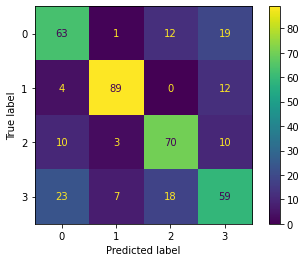

In [32]:
evaluate_sklearn(15, 4, criteria = 'entropy', isCM = True, X_train = X_train, X_val = X_val)

Train Accuracy: 0.98500, Train Precision: 0.99600, Train Recall: 0.99800
Validation Accuracy: 0.69500, Validation Precision: 0.91667, Validation Recall: 0.95652
Evaluation time for max_depth = 10, min_samples_split = 2 is 3.8254737854003906 seconds


(0.985, 0.695)

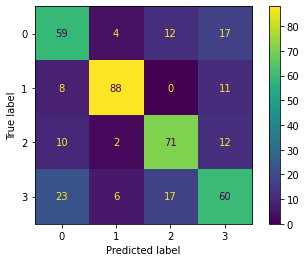

In [33]:
evaluate_sklearn(10, 2, criteria = 'entropy', isCM = True, X_train = X_train, X_val = X_val)

### grid search over 10 best parameter

In [36]:
X_comb = np.vstack((X_train, X_val))
y_comb = np.vstack((y_train, y_val))
X_new = SelectKBest(mutual_info_regression, k=10).fit_transform(X_comb, np.ravel(y_comb))


X_train_new = X_new[0:len(X_train),:]
X_val_new = X_new[len(X_train):,:]

In [34]:
selector = SelectKBest(mutual_info_regression, k=10)
X_train_new = selector.fit_transform(X_train, y_train.ravel())
X_val_new = X_val[:,selector.get_support()]

In [47]:
dtc = DecisionTreeClassifier()

# Define the grid search parameters
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 10, 15],
    'min_samples_split': [2, 4, 7, 9]
}

# Perform the grid search with 5-fold cross-validation
grid_search = GridSearchCV(dtc, params, cv=5, n_jobs = -1)
grid_search.fit(X_train_new, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 4}
Best score: 0.618


In [43]:
evaluate_sklearn(5, 7, 'gini', False, X_train_new, X_val_new)

Train Accuracy: 0.65500, Train Precision: 0.92944, Train Recall: 0.97201
Validation Accuracy: 0.59250, Validation Precision: 0.89412, Validation Recall: 0.93827
Evaluation time for max_depth = 5, min_samples_split = 7 is 0.005983114242553711 seconds


(0.655, 0.5925)

Train Accuracy: 0.75600, Train Precision: 0.93231, Train Recall: 0.98614
Validation Accuracy: 0.61250, Validation Precision: 0.85417, Validation Recall: 0.96471
Evaluation time for max_depth = 7, min_samples_split = 4 is 0.013953208923339844 seconds


(0.756, 0.6125)

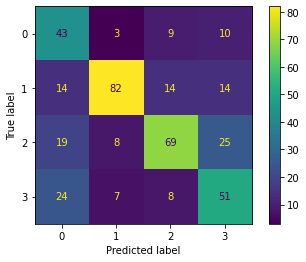

In [48]:
evaluate_sklearn(7, 4, 'entropy', True, X_train_new, X_val_new)

In [49]:
tree = DecisionTreeClassifier(max_depth = 7, criterion = 'entropy', min_samples_split = 4)
tree.fit(X_train_new, y_train)

dot_data = export_graphviz(tree, out_file=None,
                               feature_names = [i for i in range(0, X_train_new.shape[1])],
                               class_names=['person', 'car', 'air', 'dog'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

### Decision Tree Post Pruning with Cost Complexity Pruning

In [68]:
clf = DecisionTreeClassifier(criterion = 'entropy')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>


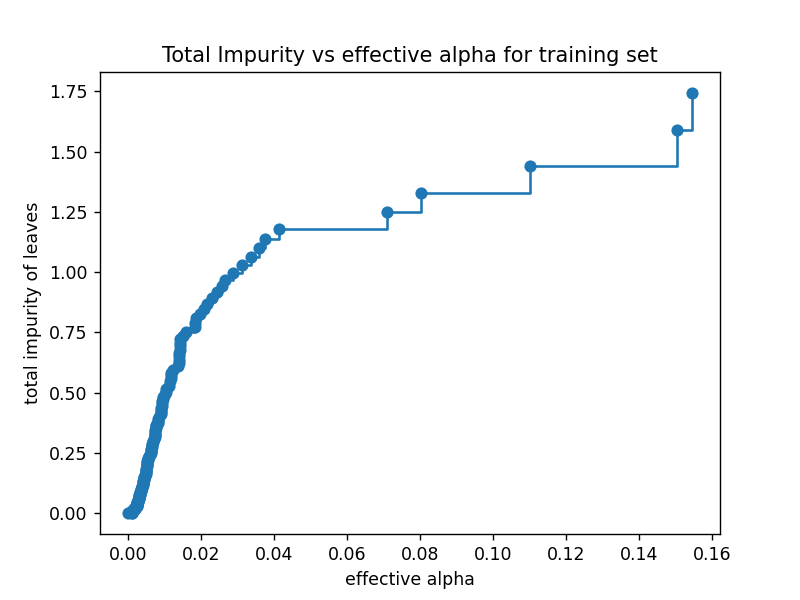

In [71]:
%matplotlib notebook
plt.close()
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()
plt.savefig("./img/multi_c_entropy_impurity.png")

In [72]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2567444220506898


<IPython.core.display.Javascript object>


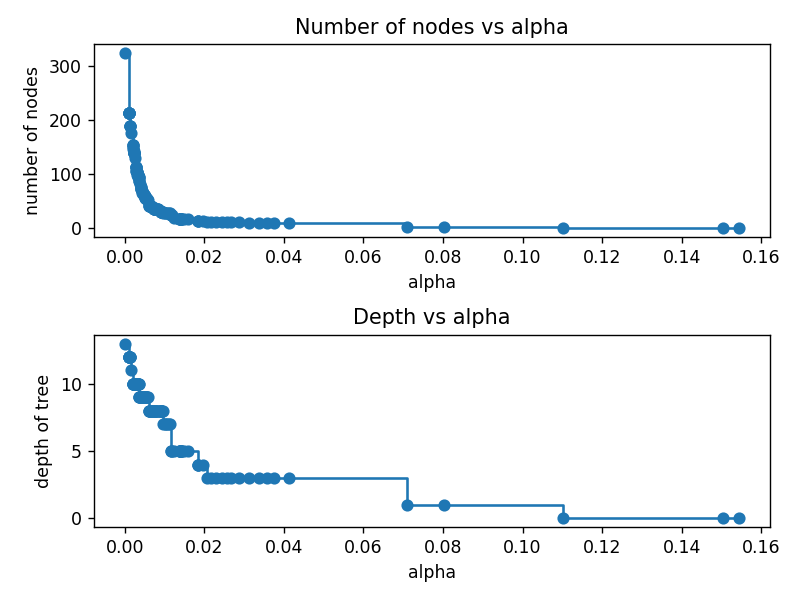

In [73]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.savefig("./img/multi_c_entropy_node_depth.png")

<IPython.core.display.Javascript object>


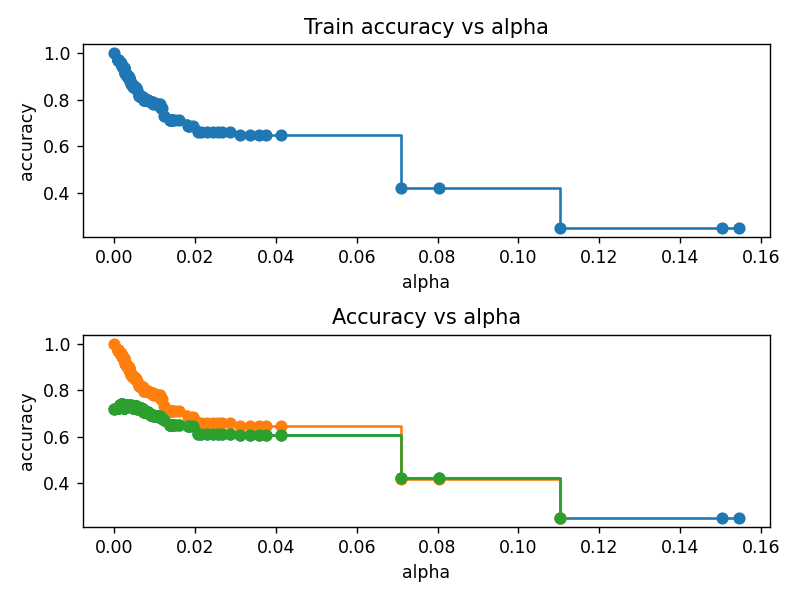

In [74]:
train_accuracy = [clf.score(X_train, y_train) for clf in clfs]
val_accuracy = [clf.score(X_val, y_val) for clf in clfs]
# test_accuracy = [clf.score(X_test, y_test) for cls in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, train_accuracy, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Train accuracy vs alpha")
ax[1].plot(ccp_alphas, val_accuracy, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("accuracy")
ax[1].set_title("Validation accuracy vs alpha")
fig.tight_layout()

<IPython.core.display.Javascript object>


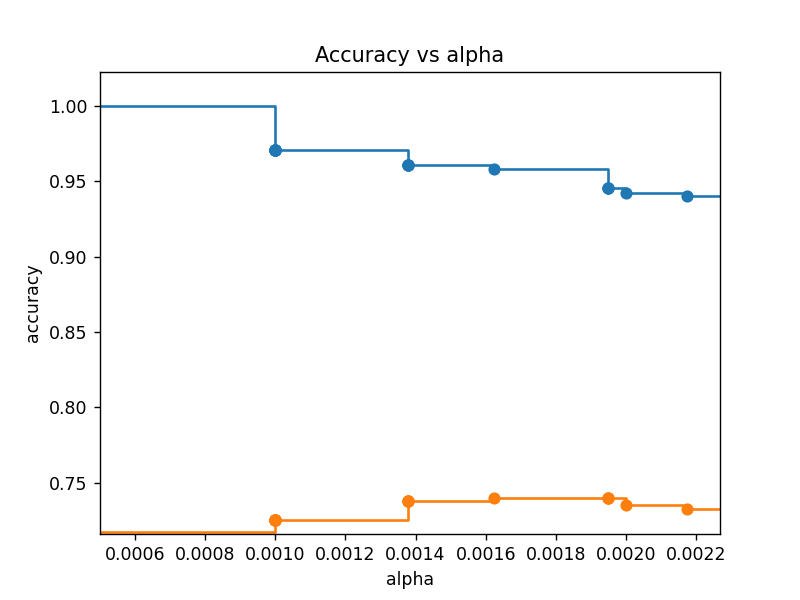

In [76]:
plt.plot(ccp_alphas[:-2], train_accuracy[:-2], marker="o", drawstyle="steps-post")
plt.plot(ccp_alphas[:-2], val_accuracy[:-2], marker="o", drawstyle="steps-post")
# plt.plot(ccp_alphas[:-2], test_accuracy[:-2], marker="o", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha")
plt.savefig("./img/multi_c_entropy_accuracy.png")

In [81]:
ccp_alphas[np.argmax(val_accuracy[:])]

0.0016225562489182656

Train Accuracy: 0.96550, Train Precision: 0.99795, Train Recall: 0.99185
Validation Accuracy: 0.74250, Validation Precision: 0.93103, Validation Recall: 0.90000
Evaluation time is 2.8817851543426514 seconds


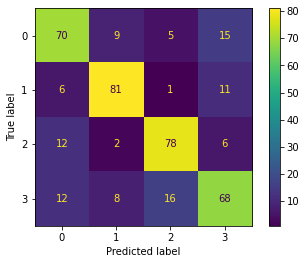

In [51]:
start =  time.time()
clf = DecisionTreeClassifier(ccp_alpha=0.00128571, criterion = 'gini')
clf.fit(X_train, y_train)

y = clf.predict(X_train)
y_pred_val = clf.predict(X_val)

# Train predictions
train_acc = accuracy_score(y_train.ravel(), y)
train_precision = precision_score(y_train.ravel(), y)
train_recall = recall_score(y_train.ravel(), y)

# Validation predictions
val_acc = accuracy_score(y_val.ravel(), y_pred_val)
val_precision = precision_score(y_val.ravel(), y_pred_val)
val_recall = recall_score(y_val.ravel(), y_pred_val)

print(f"Train Accuracy: {train_acc:.5f}, Train Precision: {train_precision:.5f}, Train Recall: {train_recall:.5f}")
print(f"Validation Accuracy: {val_acc:.5f}, Validation Precision: {val_precision:.5f}, Validation Recall: {val_recall:.5f}")
print(f'Evaluation time is {time.time() - start} seconds')

com = confusion_matrix(y_pred_val, y_val.ravel(), labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(com)
disp.plot()
name = "./img/multi_c_sklearn.png"
plt.savefig(name)


In [84]:
tree = DecisionTreeClassifier(ccp_alpha=0.0016225562489182656, criterion = 'entropy')
tree.fit(X_train, y_train)

dot_data = export_graphviz(tree, out_file=None,
                               feature_names = [i for i in range(0, X_train.shape[1])],
                               class_names=['person', 'car', 'air', 'dog'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

## Random Forest Classifier

Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.87250, Validation Precision: 0.98925, Validation Recall: 0.97872


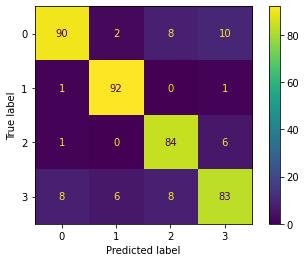

In [52]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train.ravel())
y = clf.predict(X_train)
y_pred_val = clf.predict(X_val)

# Train predictions
train_acc = accuracy_score(y_train.ravel(), y)
train_precision = precision_score(y_train.ravel(), y)
train_recall = recall_score(y_train.ravel(), y)

# Validation predictions
val_acc = accuracy_score(y_val.ravel(), y_pred_val)
val_precision = precision_score(y_val.ravel(), y_pred_val)
val_recall = recall_score(y_val.ravel(), y_pred_val)

print(f"Train Accuracy: {train_acc:.5f}, Train Precision: {train_precision:.5f}, Train Recall: {train_recall:.5f}")
print(f"Validation Accuracy: {val_acc:.5f}, Validation Precision: {val_precision:.5f}, Validation Recall: {val_recall:.5f}")
# print(f'Evaluation time for max_depth = {max_depth}, min_samples_split = {min_splitting} is {time.time() - start} seconds')

com = confusion_matrix(y_pred_val, y_val.ravel(), labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(com)
disp.plot()
name = "./img/multi_d_rf_default.png"
plt.savefig(name)

In [87]:
rfc = RandomForestClassifier()

# Define the grid search parameters
params = {
     'n_estimators': [80,100,150,200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,5,7,10],
    'min_samples_split': [5,7,10]
}

# Perform the grid search with 5-fold cross-validation
grid_search = GridSearchCV(rfc, params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.906


Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.88250, Validation Precision: 0.98936, Validation Recall: 0.97895


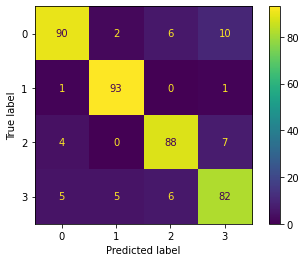

In [53]:
clf = RandomForestClassifier(criterion='entropy', min_samples_split= 5, n_estimators=200)
clf.fit(X_train, y_train.ravel())
y = clf.predict(X_train)
y_pred_val = clf.predict(X_val)

# Train predictions
train_acc = accuracy_score(y_train.ravel(), y)
train_precision = precision_score(y_train.ravel(), y)
train_recall = recall_score(y_train.ravel(), y)

# Validation predictions
val_acc = accuracy_score(y_val.ravel(), y_pred_val)
val_precision = precision_score(y_val.ravel(), y_pred_val)
val_recall = recall_score(y_val.ravel(), y_pred_val)

print(f"Train Accuracy: {train_acc:.5f}, Train Precision: {train_precision:.5f}, Train Recall: {train_recall:.5f}")
print(f"Validation Accuracy: {val_acc:.5f}, Validation Precision: {val_precision:.5f}, Validation Recall: {val_recall:.5f}")
# print(f'Evaluation time for max_depth = {max_depth}, min_samples_split = {min_splitting} is {time.time() - start} seconds')

com = confusion_matrix(y_pred_val, y_val.ravel(), labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(com)
disp.plot()
name = "./img/multi_d_rf.png"
plt.savefig(name)

## Gradient Boosted Trees

In [91]:
param_grid = {'n_estimators': [20, 30, 40, 50],
              'subsample': [0.2, 0.3, 0.4, 0.5, 0.6],
              'max_depth': [5, 6, 7, 8, 9, 10]}

gbc = GradientBoostingClassifier()

# Create Grid Search object
grid_search = GridSearchCV(gbc, param_grid, cv=5, n_jobs = -1)

# Train and time the grid search
start_time = time.time()
grid_search.fit(X_train, y_train.ravel())
train_time = time.time() - start_time

# Get best parameters and best estimator
best_gbc = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 6, 'n_estimators': 50, 'subsample': 0.6}


Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.89250, Validation Precision: 1.00000, Validation Recall: 0.98969


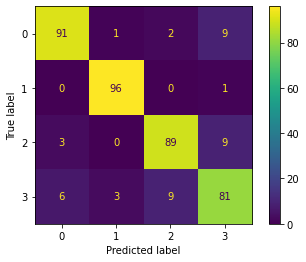

In [54]:
start = time.time()
model = GradientBoostingClassifier()
model.fit(X_train, y_train.ravel())

# Make predictions
y = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Train predictions
train_acc = accuracy_score(y_train.ravel(), y)
train_precision = precision_score(y_train.ravel(), y)
train_recall = recall_score(y_train.ravel(), y)

# Validation predictions
val_acc = accuracy_score(y_val.ravel(), y_pred_val)
val_precision = precision_score(y_val.ravel(), y_pred_val)
val_recall = recall_score(y_val.ravel(), y_pred_val)

print(f"Train Accuracy: {train_acc:.5f}, Train Precision: {train_precision:.5f}, Train Recall: {train_recall:.5f}")
print(f"Validation Accuracy: {val_acc:.5f}, Validation Precision: {val_precision:.5f}, Validation Recall: {val_recall:.5f}")
# print(f'Evaluation time for max_depth = {max_depth}, min_samples_split = {min_splitting} is {time.time() - start} seconds')

com = confusion_matrix(y_pred_val, y_val.ravel(), labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(com)
disp.plot()
name = "./img/multi_f_gbc_cm_default.png"
plt.savefig(name)

Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.90000, Validation Precision: 1.00000, Validation Recall: 0.98980


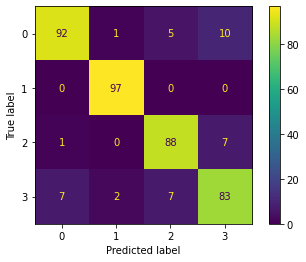

In [55]:
model = GradientBoostingClassifier(max_depth = 6, n_estimators = 50, subsample = 0.6)
model.fit(X_train, y_train.ravel())

# Make predictions
y = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Train predictions
train_acc = accuracy_score(y_train.ravel(), y)
train_precision = precision_score(y_train.ravel(), y)
train_recall = recall_score(y_train.ravel(), y)

# Validation predictions
val_acc = accuracy_score(y_val.ravel(), y_pred_val)
val_precision = precision_score(y_val.ravel(), y_pred_val)
val_recall = recall_score(y_val.ravel(), y_pred_val)

print(f"Train Accuracy: {train_acc:.5f}, Train Precision: {train_precision:.5f}, Train Recall: {train_recall:.5f}")
print(f"Validation Accuracy: {val_acc:.5f}, Validation Precision: {val_precision:.5f}, Validation Recall: {val_recall:.5f}")
# print(f'Evaluation time for max_depth = {max_depth}, min_samples_split = {min_splitting} is {time.time() - start} seconds')

com = confusion_matrix(y_pred_val, y_val.ravel(), labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(com)
disp.plot()
name = "./img/multi_f_gbc_cm.png"
plt.savefig(name)

## XGBoost

Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.90250, Validation Precision: 1.00000, Validation Recall: 0.98969
Evaluation time is 16.616387605667114 seconds


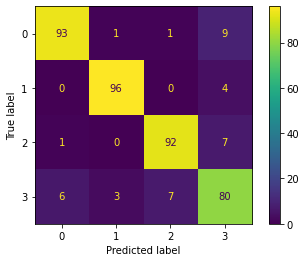

In [56]:
start = time.time()
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Train predictions
train_acc = accuracy_score(y_train.ravel(), y)
train_precision = precision_score(y_train.ravel(), y)
train_recall = recall_score(y_train.ravel(), y)

# Validation predictions
val_acc = accuracy_score(y_val.ravel(), y_pred_val)
val_precision = precision_score(y_val.ravel(), y_pred_val)
val_recall = recall_score(y_val.ravel(), y_pred_val)

print(f"Train Accuracy: {train_acc:.5f}, Train Precision: {train_precision:.5f}, Train Recall: {train_recall:.5f}")
print(f"Validation Accuracy: {val_acc:.5f}, Validation Precision: {val_precision:.5f}, Validation Recall: {val_recall:.5f}")
print(f'Evaluation time is {time.time() - start} seconds')

com = confusion_matrix(y_pred_val, y_val.ravel(), labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(com)
disp.plot()
name = "./img/multi_f_xgb_cm_default.png"
plt.savefig(name)

In [ ]:
param_grid = {'n_estimators': [20, 30, 40, 50, 60, 70, 80, 100],
              'subsample': [0.2, 0.3, 0.4, 0.45, 0.5, 0.6],
              'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 15]}

gbc = XGBClassifier(n_jobs = -1)

# Create Grid Search object
grid_search = GridSearchCV(gbc, param_grid, cv=5, n_jobs = -1)

# Train and time the grid search
start_time = time.time()
grid_search.fit(X_train, y_train.ravel())
train_time = time.time() - start_time

# Get best parameters and best estimator
best_gbc = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

Train Accuracy: 1.00000, Train Precision: 1.00000, Train Recall: 1.00000
Validation Accuracy: 0.90750, Validation Precision: 1.00000, Validation Recall: 0.98958


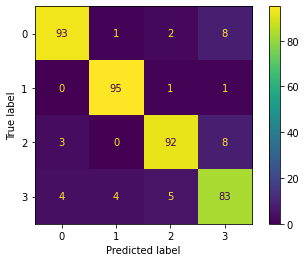

In [57]:
model = XGBClassifier(max_depth = 8, n_estimators = 50, subsample = 0.4)
model.fit(X_train, y_train)

# Make predictions
y = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Train predictions
train_acc = accuracy_score(y_train.ravel(), y)
train_precision = precision_score(y_train.ravel(), y)
train_recall = recall_score(y_train.ravel(), y)

# Validation predictions
val_acc = accuracy_score(y_val.ravel(), y_pred_val)
val_precision = precision_score(y_val.ravel(), y_pred_val)
val_recall = recall_score(y_val.ravel(), y_pred_val)

print(f"Train Accuracy: {train_acc:.5f}, Train Precision: {train_precision:.5f}, Train Recall: {train_recall:.5f}")
print(f"Validation Accuracy: {val_acc:.5f}, Validation Precision: {val_precision:.5f}, Validation Recall: {val_recall:.5f}")
# print(f'Evaluation time for max_depth = {max_depth}, min_samples_split = {min_splitting} is {time.time() - start} seconds')

com = confusion_matrix(y_pred_val, y_val.ravel(), labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(com)
disp.plot()
name = "./img/multi_f_xgb_cm_default.png"
plt.savefig(name)

## Real Application

In [147]:
# dir(os.path)

In [58]:
def readimg(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (32,32))
    return img.flatten()

In [59]:
test_path = sorted(glob.glob(os.path.join("./self_img/", "*.jpeg")), key=len)
print(test_path)

['./self_img\\1.jpeg', './self_img\\3.jpeg', './self_img\\4.jpeg', './self_img\\5.jpeg', './self_img\\6.jpeg', './self_img\\7.jpeg', './self_img\\8.jpeg', './self_img\\9.jpeg', './self_img\\10.jpeg', './self_img\\11.jpeg']


In [60]:
X_test = None
i=0
for img in test_path:
    if(i==0):
        X_test = readimg(test_path[0])
        i+=1
    else:
        X_test = np.vstack((X_test, readimg(img)))

In [61]:
X_test.shape

(10, 3072)

In [62]:
start = time.time()
clf = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy', min_samples_split = 7)
clf = clf.fit(X_train,y_train)

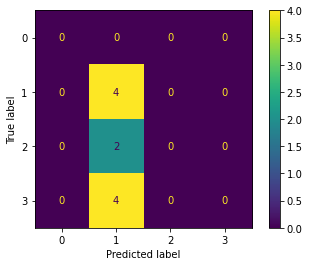

In [63]:
y1 = clf.predict(X_test)
com = confusion_matrix(y1, [1]*10, labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(com)
disp.plot()
name = "./img/multi_real_clf.png"
plt.savefig(name)

In [64]:
y1

array([3., 3., 1., 2., 1., 2., 1., 1., 3., 3.])

In [77]:
model = XGBClassifier(max_depth = 10, n_estimators = 150, subsample = 0.45, n_jobs = -1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

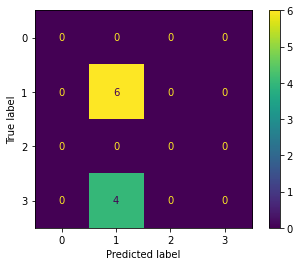

In [78]:
y2 = model.predict(X_test)
com = confusion_matrix(y2, [1]*10, labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(com)
disp.plot()
name = "./img/multi_real_xgb.png"
plt.savefig(name)

In [119]:
# start = time.time()
# clf = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', min_samples_split = 7)
# clf = clf.fit(X_train,y_train)
# y = clf.predict(X_train)
# y_pred_val = clf.predict(X_val)

# # Train predictions
# train_acc = accuracy_score(y_train.ravel(), y)
# train_precision = precision_score(y_train.ravel(), y)
# train_recall = recall_score(y_train.ravel(), y)

# # Validation predictions
# val_acc = accuracy_score(y_val.ravel(), y_pred_val)
# val_precision = precision_score(y_val.ravel(), y_pred_val)
# val_recall = recall_score(y_val.ravel(), y_pred_val)

# print(f"Train Accuracy: {train_acc:.5f}, Train Precision: {train_precision:.5f}, Train Recall: {train_recall:.5f}")
# print(f"Validation Accuracy: {val_acc:.5f}, Validation Precision: {val_precision:.5f}, Validation Recall: {val_recall:.5f}")
# print(f'Evaluation time for max_depth = {max_depth}, min_samples_split = {min_splitting} is {time.time() - start} seconds')

# return train_acc, val_acc

Train Accuracy: 0.96900, Train Precision: 1.00000, Train Recall: 0.99177
Validation Accuracy: 0.73750, Validation Precision: 0.90411, Validation Recall: 0.92958


NameError: name 'max_depth' is not defined

In [177]:
for i in test_path:
    print(os.path.basename(i).split(".")[0])

1
3
4
5
6
7
8
9
10
11
